<a href="https://colab.research.google.com/github/matibag1714977/LabiagiProject/blob/main/Progetto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Progetto-Scene Classification**

#Import vari

In [2]:
import numpy as np      #to perform mathematical operations on arrays and matrices
import matplotlib.pyplot as plt  #to visualize images and plot graphs

#provides algoithms and tools for data analysis and modeling(classification,regression,clustering)
from sklearn.model_selection import train_test_split        
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# It provides various tools and functions for image and video processing, including image filtering, feature detection, and object tracking.
import cv2
import imghdr
import os

import torch
import torchvision
import torchvision.transforms as transforms
import tensorflow as tf





#Import dataset Prova

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

#folder_id = '1pFM_HpOjh0qbAadk0-1Fz89mwLHrnQHB?usp=share_link'
folder_id ='1uN5c1p7GkKE9xqQ3DyFbFWfRJQCTod-E?usp=share_link'
data_path = '/content/gdrive/MyDrive/Dataset/input_data2'


# mount the folder
drive.mount('/content/gdrive', force_remount=True)




Mounted at /content/gdrive
Mounted at /content/gdrive


Con SUN397

In [4]:
dataset_dir = '/content/gdrive/MyDrive/Dataset/SUN397'
classess = os.listdir(dataset_dir)
print(len(classess))


276


#Dividere tramite Pytorch

100 ogni classe

In [ ]:
import os
import random
from torchvision.datasets import ImageFolder
from torch.utils.data import Subset
import torch
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torch.utils.data as data

# Definire la trasformazione delle immagini
transform = transforms.Compose(
    [transforms.Resize((224, 224)),transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# Definire il percorso della cartella contenente le immagini selezionate
dataset_path = '/content/gdrive/MyDrive/Dataset/SUN397'

# Creare un dataset PyTorch dalla cartella delle immagini selezionate
dataset = ImageFolder(dataset_path, transform=transform)
classes276 = dataset.classes
# Creare un elenco di indici di campioni per ogni classe
class_indices = dataset.class_to_idx
indices = []
for c in class_indices.values():
    class_samples = [i for i, (_, label) in enumerate(dataset.samples) if label == c]
    indices += random.sample(class_samples, 100)

# Creare un Subset di PyTorch dataset contenente solo gli indici selezionati
subset = Subset(dataset, indices)
b_size=10

# Dividere il Subset in train, validation e test set utilizzando random_split
train_ratio = 0.8
val_ratio = 0.1
test_ratio = 0.1
train_data = int(len(subset) * train_ratio)
val_data = int(len(subset) * val_ratio)
test_data = len(subset) - train_data - val_data
train_set, val_set, test_set = data.random_split(subset, [train_data, val_data, test_data])

train_loader=data.DataLoader(train_set,batch_size=b_size, shuffle=True, num_workers=2)
validation_loader=data.DataLoader(val_set,batch_size=b_size, shuffle=False,  num_workers=2)
test_loader=data.DataLoader(test_set,batch_size=b_size,shuffle=False, num_workers=2)


# Stampa delle dimensioni di ogni set
print(f"Numero di campioni di training: {len(train_set)}")
print(f"Numero di campioni di validation: {len(val_set)}")
print(f"Numero di campioni di test: {len(test_set)}")
print(classes276)

Numero immagini in train-set diviso per classi

In [ ]:
# Conta il numero di campioni per classe nel train set
class_count = torch.zeros(len(classes276))
for _, label in train_set:
    class_count[label] += 1

# Stampa il numero di campioni per classe nel train set
for i, class_name in enumerate(classes276):
    print(f"{class_name}: {class_count[i]}")

Numero di immagini presenti in test-set diviso per classi

Tutto

In [ ]:
import os
import torch
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torch.utils.data as data

# Definisci la trasformazione delle immagini
transform = transforms.Compose(
    [transforms.Resize((224, 224)),transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

input_path='/content/gdrive/MyDrive/Dataset/SUN397'
# Trasforma il dataset
dataset = datasets.ImageFolder(input_path, transform=transform)

#print(dataset)

# Definisci le proporzioni di training, validation e test set
train_ratio = 0.80
val_ratio = 0.10
test_ratio = 0.10

b_size=27

# Calcola le lunghezze dei subset
train_size = int(train_ratio * len(dataset))
val_size = int(val_ratio * len(dataset))
test_size = len(dataset) - train_size - val_size

# Dividi il dataset in training, validation e test set
train_data, test_data, val_data = data.random_split(dataset, [train_size, test_size, val_size])

train_loader=data.DataLoader(train_data,batch_size=b_size, shuffle=True, num_workers=2)
validation_loader=data.DataLoader(val_data,batch_size=b_size, shuffle=True,  num_workers=2)
test_loader=data.DataLoader(test_data,batch_size=b_size,shuffle=False, num_workers=2)

print(len(train_data))
print(len(val_data))
print(len(test_data))

#classes = ('airport_terminal', 'beach', 'bridge', 'forest',
  #         'mountain', 'playground', 'river', 'skyscraper', 'street', 'temple')
#classes = ('airport_terminal', 'beach', 'bridge','fire_station', 'forest','formal_garden','fountain','ice_skating','iceberg','lake','market',
   #        'mountain', 'playground', 'river','rock_arch','ruin', 'skyscraper', 'street', 'temple','tennis_court')






63512
7939
7939


#Carico resnet50

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.models as models

# Load ResNet50 model
resnet50 = models.resnet50(weights=None)




# Prova uso gpu

In [ ]:
import torch

if torch.cuda.is_available():
  device = torch.device("cuda")
  print("Using GPU:", torch.cuda.get_device_name(0))
else:
  device = torch.device("cpu")
  print("Using CPU")
print(device)

# Resnet che corre su device
resnet50.to(device)

# Loss e optimizer

In [ ]:

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(resnet50.parameters(), lr=0.001, momentum=0.9)
#optimizer = optim.Adam(resnet50.parameters(), lr=0.001)

# Train

Inizializzo le liste per raccogliere dati

In [ ]:
loss_values = []  # lista vuota per raccogliere i valori della loss function
val_loss_values = []

# Carico dati

In [ ]:
loss_values = np.load('/content/gdrive/MyDrive/Dataset/Test3/loss_Adam_001.npy').tolist()
val_loss_values=np.load('/content/gdrive/MyDrive/Dataset/Test3/val_Adam_001.npy').tolist()

Definisco validation

In [ ]:
def validate(model, criterion, validation_loader):
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for data in validation_loader:
            inputs, labels = data[0].to(device), data[1].to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
    return val_loss / len(validation_loader)

# Training

In [ ]:
num_epochs=10
PATH = '/content/gdrive/MyDrive/Dataset/Test4/001.pth'

for epoch in range(num_epochs):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        #inputs, labels = data

        #mandare inputs e a ogni passo alla gpu
        inputs, labels = data[0].to(device), data[1].to(device)
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = resnet50(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # statistica
        running_loss += loss.item()
        if i % 200== 199: # ogni 200 batch da b_size immagini
            # aggiungi il valore della loss alla lista
            loss_values.append(running_loss / 200)
            val_loss = validate(resnet50, criterion, validation_loader)
            val_loss_values.append(val_loss)
            print(f'[{epoch + 1},{i + 1:4d}] loss: {running_loss / 200:.3f} val_loss:{val_loss:.3f}')
            running_loss = 0.0
            
            torch.save(resnet50.state_dict(), PATH)   
print('Finished Training')

# Training con K-Fold-Crossvalidation

In [ ]:
from sklearn.model_selection import KFold
import os
import torch
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torch.utils.data as data
from torch.utils.data.sampler import SubsetRandomSampler

# Definisci la trasformazione delle immagini
transform = transforms.Compose(
    [transforms.Resize((224, 224)),transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

input_path='/content/gdrive/MyDrive/Dataset/SUN397'
# Trasforma il dataset
dataset = datasets.ImageFolder(input_path, transform=transform)

# Definisci le proporzioni di training, validation e test set
train_ratio = 0.90
test_ratio = 0.10

b_size=10

# Calcola le lunghezze dei subset
train_size = int(train_ratio * len(dataset))
test_size = len(dataset) - train_size 

# Dividi il dataset in training, validation e test set
train_dataset, test_data= data.random_split(dataset, [train_size, test_size])

In [ ]:
# Definisci il numero di fold
k = 5
kf = KFold(n_splits=k)
num_epochs=2


# Loop over folds
for fold, (train_indices, val_indices) in enumerate(kf.split(train_dataset)):

    # Definisci i dataloaders per il train e la validation per il fold corrente
    train_sampler = SubsetRandomSampler(train_indices)
    val_sampler = SubsetRandomSampler(val_indices)
    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=b_size, sampler=train_sampler)
    validation_loader = torch.utils.data.DataLoader(train_dataset, batch_size=b_size, sampler=val_sampler)

    # Inizializza il modello e l'ottimizzatore per ogni fold
    resnet50 = models.resnet50(weights=None)
    resnet50.to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(resnet50.parameters(), lr=0.001, momentum=0.9)

    # Loop over epochs per il fold corrente
    for epoch in range(num_epochs):
        running_loss = 0.0
        resnet50.train() # setta il modello in modalità training

        # Loop over batches per il fold corrente
        for i, data in enumerate(train_loader, 0):
            inputs, labels = data[0].to(device), data[1].to(device)
            optimizer.zero_grad()
            outputs = resnet50(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        # Calcola la perdita sul training set per il fold corrente
        train_loss = running_loss / len(train_loader)
        loss_values.append(train_loss)

        # Calcola la perdita sulla validation set per il fold corrente
        val_loss = validate(resnet50, criterion, validation_loader)
        val_loss_values.append(val_loss)

        # Stampa la perdita corrente
        print(f"Fold {fold+1}/{k}, Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}")

    # Salva i pesi del modello per il fold corrente
    path = "/content/drive/MyDrive/Test4/fold" + str(fold+1) + ".pth"
    torch.save(resnet50.state_dict(), path)

print('Finished Training')


# Salvo dati

In [ ]:
np.save('/content/gdrive/MyDrive/Dataset/Test4/loss_SGD_.npy', loss_values)
np.save('/content/gdrive/MyDrive/Dataset/Test4/val_SGD_.npy', val_loss_values)

# Stampo loss function

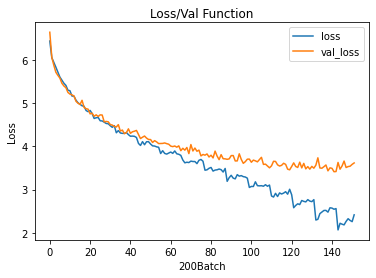

In [ ]:
# creo grafico lineare
plt.plot(loss_values)
plt.plot(val_loss_values)

# titolo e assi
plt.title('Loss/Val Function')
plt.xlabel('200Batch')
plt.ylabel('Loss')

plt.legend(['loss','val_loss'],loc='upper right')
plt.show()

# Salvo il modello dopo il training

In [ ]:
PATH = '/content/gdrive/MyDrive/Dataset/Test4/001.pth'
torch.save(resnet50.state_dict(), PATH)

# Carico modello salvato precedentemente

In [ ]:
resnet50 = models.resnet50(weights=None)
PATH = '/content/gdrive/MyDrive/Dataset/2_SGD_001/resnet50lr001.pth'
# Carico i pesi salvati precedentemente
resnet50.load_state_dict(torch.load(PATH))
resnet50.to(device)

# Uso modello su test

In [ ]:

correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = resnet50(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
accuracy = 100 * correct / total
print('Accuracy of the model on the test images: {:.2f}%'.format(accuracy))

Accuracy of the model on the test images: 20.43%


#Classi peggiori e migliori

In [ ]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes276}
total_pred = {classname: 0 for classname in classes276}

# again no gradients needed
with torch.no_grad():
    for data in test_loader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = resnet50(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes276[label]] += 1
            total_pred[classes276[label]] += 1


# print accuracy for each class in descending order of accuracy
for classname, correct_count in sorted(correct_pred.items(), key=lambda x: x[1], reverse=True):
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

# calculate overall accuracy
total_correct = sum(correct_pred.values())
total = sum(total_pred.values())
overall_accuracy = 100 * float(total_correct) / total
print(f'\nOverall accuracy is {overall_accuracy:.1f} %')


Accuracy for class: bamboo_forest is 81.8 %
Accuracy for class: baseball_field is 50.0 %
Accuracy for class: driveway is 47.4 %
Accuracy for class: arrival_gate is 88.9 %
Accuracy for class: bookstore is 87.5 %
Accuracy for class: bullring is 70.0 %
Accuracy for class: catacomb is 58.3 %
Accuracy for class: kindergarden_classroom is 63.6 %
Accuracy for class: coast is 50.0 %
Accuracy for class: courthouse is 46.2 %
Accuracy for class: discotheque is 42.9 %
Accuracy for class: elevator_shaft is 40.0 %
Accuracy for class: ice_shelf is 54.5 %
Accuracy for class: igloo is 66.7 %
Accuracy for class: nursery is 46.2 %
Accuracy for class: pharmacy is 50.0 %
Accuracy for class: raft  is 75.0 %
Accuracy for class: sauna is 75.0 %
Accuracy for class: ski_resort is 60.0 %
Accuracy for class: valley is 54.5 %
Accuracy for class: vegetable_garden is 37.5 %
Accuracy for class: ball_pit is 71.4 %
Accuracy for class: beach is 45.5 %
Accuracy for class: bus_interior is 35.7 %
Accuracy for class: cockpi

# Test con immagini

In [ ]:
dataiter = iter(test_loader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes276[labels[j]]:5s}' for j in range(4)))

In [ ]:
images = images.to(device)
outputs = resnet50(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))